# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [163]:
import pandas as pd
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False, dtype={'prod1':'str','prod2':'str'})
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [164]:
df.shape

(357727, 19)

### List the columns and their data types

In [165]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [166]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [167]:
df['body_part'].value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [168]:
replacements = {
 0:  'internal',
 30: 'shoulder',
 31: 'upper trunk',
 32: 'elbow',
 33: 'lower arm',
 34: 'wrist',
 35: 'knee',
 36: 'lower leg',
 37: 'ankle',
 38: 'pubic region',
 75: 'head',
 76: 'face',
 77: 'eyeball',
 79: 'lower trunk',
 80: 'upper arm',
 81: 'upper leg',
 82: 'hand',
 83: 'foot',
 84: '25-50% of body',
 85: 'all parts of body',
 87: 'not recorded',
 88: 'mouth',
 89: 'neck',
 92: 'finger',
 93: 'toe',
 94: 'ear' 
}
df.body_part.replace(replacements, inplace=True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [169]:
df.sex.value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

In [170]:
#Male 1 
#Female 2 
#Not recorded 0

In [171]:
df.sex=df.sex.replace(1,'Male')
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


In [172]:
df.sex.replace(2,'Female', inplace=True)
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


In [173]:
df.sex.replace(0,'Not recorded', inplace=True)
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [174]:
df['body_part'].value_counts().head()

head           58677
face           30992
lower trunk    30579
finger         30463
ankle          20077
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

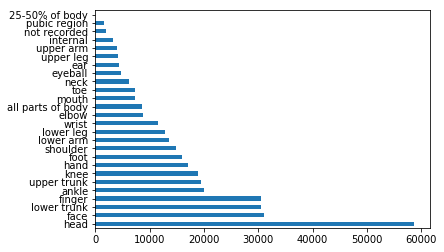

In [175]:
%matplotlib inline
df[df.body_part != 'Not Recorded'].body_part.value_counts().plot(kind='barh')

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [176]:
import numpy as np
np.nan

nan

In [177]:
df.body_part.replace('not recorded', np.nan, inplace=True)
df.body_part.value_counts(dropna=False)

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
NaN                   2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

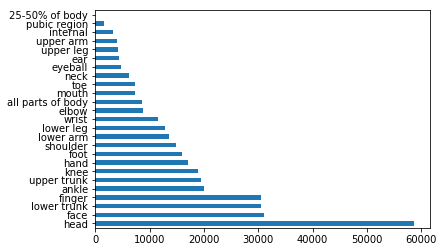

In [178]:
df['body_part'].value_counts().plot(kind='barh')

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [179]:
df.groupby('body_part')['age'].mean().sort_values()

body_part
pubic region         19.985874
ear                  24.248183
ankle                28.477512
wrist                30.697968
lower arm            32.357598
foot                 32.578666
knee                 34.106451
toe                  34.988766
hand                 35.811208
finger               35.978170
elbow                36.592934
eyeball              36.669599
neck                 38.354109
shoulder             39.266901
lower leg            44.255814
25-50% of body       44.333333
upper leg            45.934835
upper trunk          46.587663
upper arm            46.655129
face                 47.749193
lower trunk          49.667844
mouth                51.241957
head                 59.512637
internal             62.912978
all parts of body    63.406268
Name: age, dtype: float64

## Wait, "all parts of body" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [180]:
df.loc[df.age > 200, 'age'] = (df['age'] - 200) / 12

In [181]:
df['age'].value_counts().sort_index()

0.000000         37
0.083333        569
0.166667        433
0.250000        414
0.333333        427
0.416667        552
0.500000        669
0.583333        759
0.666667        849
0.750000        856
0.833333        876
0.916667        885
1.000000       1188
1.083333        989
1.166667       1074
1.250000       1093
1.333333       1094
1.416667       1133
1.500000       1191
1.583333       1097
1.666667       1135
1.750000       1132
1.833333       1099
1.916667       1041
2.000000      11735
3.000000      10117
4.000000       8262
5.000000       7633
6.000000       7282
7.000000       7081
              ...  
78.000000      1752
79.000000      1679
80.000000      1689
81.000000      1717
82.000000      1678
83.000000      1711
84.000000      1715
85.000000      1658
86.000000      1645
87.000000      1654
88.000000      1639
89.000000      1425
90.000000      1439
91.000000      1232
92.000000      1019
93.000000       780
94.000000       745
95.000000       535
96.000000       424


# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [182]:
(df.prod1 == '0565').value_counts()

False    357727
Name: prod1, dtype: int64

### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

In [183]:
df.prod1 = df.prod1.str.pad(4, fillchar='0')

In [184]:
df.prod1.value_counts()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
0464     7281
0611     7184
1267     7140
3299     7057
0679     5081
1615     3673
4078     3665
1233     3197
4056     3116
5041     3063
1616     2949
1817     2933
1333     2858
1141     2831
1244     2692
0604     2635
1871     2608
3265     2549
1894     2519
0649     2475
        ...  
0531        2
0650        2
0878        2
0119        1
1515        1
1441        1
0932        1
0223        1
0221        1
0212        1
1350        1
0139        1
0556        1
1531        1
0213        1
0270        1
0958        1
1517        1
5013        1
0240        1
0558        1
1739        1
0401        1
0462        1
0807        1
0236        1
1539        1
0116        1
0125        1
0533        1
Name: prod1, Length: 757, dtype: int64

## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [185]:
code = ['0565','0566','1344']

In [186]:
df[df.prod1.isin(code)].shape

(226, 19)

## Out of those three, which is the most popular reason for admission?

In [187]:
df[df.prod1.isin(code)].prod1.value_counts()

0566    188
1344     24
0565     14
Name: prod1, dtype: int64

## What parts of the body are injured by musical instruments most often?

In [188]:
df[df.prod1.isin(code)]['body_part'].value_counts().head()

face           32
head           30
finger         23
upper trunk    19
mouth          18
Name: body_part, dtype: int64

# Adding categories

## Read in `categories-cleaned.txt`

In [189]:
df_categories = pd.read_csv("categories-cleaned.txt", header=None, names=["product_id", "product_description"], dtype=str)

In [190]:
df_categories.head()

,product_id,product_description
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


## How many different categories are electric/electrical/electronic?

In [191]:
df_categories[df_categories.product_description.str.contains(r".*(?<!not )\belectr.*", case=False)]

,product_id,product_description
1,0106,Electric clothes dryers without washers
3,0110,Electric heating pads
8,0116,Electric brooms
10,0119,Electric water heaters (excluding immersion he...
14,0132,Electric blankets or sheets
22,0212,Electric corn poppers
23,0213,Electric can openers
25,0215,Electric blenders
26,0216,"Electric counter-top ovens, broilers or toaste..."
27,0217,Electric coffee makers or teapots


In [192]:
df_categories.product_description.str.contains(r".*(?<!not )\belectr.*", case=False).value_counts()

False    752
True      51
Name: product_description, dtype: int64

## Join this with your injuries dataframes to give every row a text product code

In [193]:
df= df.merge(df_categories, left_on='prod1', right_on='product_id')
df

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,product_id,product_description
0,150733174,07/11/2015,38,15.7762,V,5.000000,Male,0,NaN,57,...,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20.000000,Female,1,NaN,57,...,lower leg,1,9,0,1267,NaN,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10.000000,Female,0,NaN,57,...,lower arm,1,0,0,1267,NaN,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37.000000,Male,1,NaN,64,...,knee,1,0,0,1267,NaN,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13.000000,Female,0,NaN,62,...,head,1,9,0,1267,NaN,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"
5,151038066,10/16/2015,21,16.5650,V,13.000000,Female,0,NaN,64,...,wrist,1,9,0,1267,NaN,13YF WRIST PAIN S/P FOOSH WHILE PLAYING SOCCER...,>>SPRAIN,1267,"Soccer (activity, apparel or equipment)"
6,150959538,09/18/2015,32,5.6748,C,15.000000,Male,1,NaN,64,...,foot,1,9,0,1267,NaN,15 YOM PLAYING SOCCER BEGAN HAVING HEEL PAIN D...,NaN,1267,"Soccer (activity, apparel or equipment)"
7,150442809,04/15/2015,25,15.0591,V,15.000000,Female,1,NaN,64,...,foot,1,8,0,1267,NaN,A 15YOF INJURED FOOT WHILE PLAYING SOCCER AT S...,NaN,1267,"Soccer (activity, apparel or equipment)"
8,151042493,10/15/2015,8,5.6748,C,17.000000,Female,1,NaN,57,...,face,1,9,0,1267,NaN,17YOF COLLIDED HEADS PLAYING SOCCER GAME; ORBI...,COMPLEX RFX.,1267,"Soccer (activity, apparel or equipment)"
9,151026219,09/02/2015,14,49.2646,M,15.000000,Male,0,NaN,52,...,head,1,8,0,1267,NaN,15YOM CONCUSSION - KNEED PLAYING SOCCER,NaN,1267,"Soccer (activity, apparel or equipment)"


## How many different injuries involved an electric/electrical/electronic product?

In [194]:
df.product_description.str.contains(r".*(?<!not )\belectr.*", case=False).value_counts()

False    355686
True       2035
Name: product_description, dtype: int64

## Graph the most common injuries involving an electrical product

In [195]:
df_injury = df[df.product_description.str.contains(r".*(?<!not )\belectr.*", case=False)]

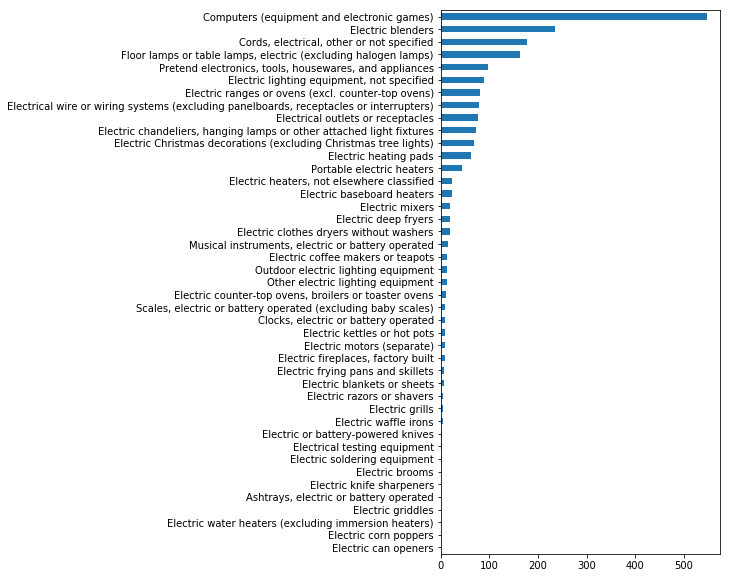

In [196]:
df_injury['product_description'].value_counts(ascending=True).plot(kind="barh", figsize=(5, 10))

## When people get injuries using an electrical product, what part of their body is injured?

In [197]:
df_injury['body_part'].value_counts()

finger               323
head                 276
hand                 195
face                 179
lower trunk          138
foot                 129
all parts of body    120
upper trunk           99
lower arm             69
eyeball               56
toe                   56
shoulder              51
lower leg             51
neck                  48
wrist                 47
mouth                 44
knee                  35
ankle                 27
elbow                 22
upper leg             20
internal              17
upper arm             16
pubic region           6
ear                    6
Name: body_part, dtype: int64

## What product is most likely to injure your mouth?

In [198]:
df_injury[df_injury.body_part == "mouth"].product_description.value_counts().head()

Computers (equipment and electronic games)                        19
Pretend electronics, tools, housewares, and appliances            11
Floor lamps or table lamps, electric (excluding halogen lamps)     4
Cords, electrical, other or not specified                          3
Clocks, electric or battery operated                               1
Name: product_description, dtype: int64

## What product is most likely to injure your ears?

In [199]:
df_injury[df_injury.body_part == "ear"].product_description.value_counts().head()

Pretend electronics, tools, housewares, and appliances    1
Other electric lighting equipment                         1
Electric baseboard heaters                                1
Electric razors or shavers                                1
Computers (equipment and electronic games)                1
Name: product_description, dtype: int64